<a href="https://colab.research.google.com/github/s-c-soma/Deeplearning-CMPE-258/blob/main/Assignment_3/Assignment_3_Part_C_1_Tensorflow(without_auto_differentiation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3 Layer Neural Network (with relu nonlinearity) Using Tensorflow (without auto differentiation)

# Implementation Details and Discussion

* Here, I have generated the 3d input and 2d output data first.
* Then I have built a 3 layer neural network from scrach using Tensorflow with ReLU non linearity
* Here the output has 2 neurons

## Steps: 
Inside steps that is implemented in each section using Tensorflow:
- Initialized the parameters for a three-layer network 
- Implemented the forward propagation module 
     - Used ACTIVATION function ReLU
     - Combined the previous steps into a new [LINEAR->ACTIVATION] forward function.
- Computed the MSE loss.
- Implemented the backward propagation module
    - Complete the linear part of a layer's backward propagation step.
    - Used the gradient of the ACTIVATE function relu_backward
    - Combine the previous steps into a new [LINEAR->ACTIVATION] backward function.
- Finally updated the parameters.
- After 2000 epochs, loss 0.07622531801462173

## Equation of Multi Layer:
$$ Z^{[l]} = W^{[l]}A^{[l-1]} + b^{[l]} $$

$$ A^{[l]} = g^{[l]}(Z^{[l]}) $$

Where $l$ is the `lth` layer.

## ExtraCredit:
* At the bottom I have plotted the data in 3d space. 
* To plot 3 dimensional data, I have reduced x into 2-d using TSNE

# Check if GPU/TPU available

In [ ]:
!nvidia-smi

Mon Mar 22 00:29:40 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Colab environment

In [ ]:
!python --version

Python 3.7.10


In [ ]:
!pip list | grep tensor

tensorboard                   2.4.1         
tensorboard-plugin-wit        1.8.0         
tensorflow                    2.4.1         
tensorflow-datasets           4.0.1         
tensorflow-estimator          2.4.0         
tensorflow-gcs-config         2.4.0         
tensorflow-hub                0.11.0        
tensorflow-metadata           0.28.0        
tensorflow-probability        0.12.1        


In [ ]:
!pip list | grep torch

torch                         1.8.0+cu101   
torchsummary                  1.5.1         
torchtext                     0.9.0         
torchvision                   0.9.0+cu101   


# Library

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from typing import Callable

# Generating Data: 3D Input :: 2D Output

In [ ]:
# Generating data of 3 dim input and 2 dim output
#tensorflow funcs
n, d = 500, 3
x = tf.random.uniform(minval=-1, maxval=1, shape = (n, d))
x2 = tf.cast(x**2, tf.float32)
weights_true = tf.cast(tf.constant([[5,1,5],[1,2,1]]), tf.float32)
bias_true = tf.cast(tf.constant([1,2]), tf.float32)
y_true = tf.matmul(x2, weights_true, transpose_b=True) + tf.matmul(x,weights_true,transpose_b=True) + bias_true

print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

x: (500, 3), weights: (2, 3), bias: (2,), y: (500, 2)


# Building Multi Layer NN: 3 Layer


## Loss Function (MSE)

In [ ]:
class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return tf.reduce_mean((y_pred - y_true) ** 2)

  def backward(self):
    n = self.y_true.shape[0]
    self.gradient = 2. * (self.y_pred - self.y_true) / n
    return self.gradient

## Building Linear Layer


In [ ]:

class Linear:
  #Randomly initialize weight and bias
  def __init__(self, input_dim: int, num_hidden: int = 1):
    self.weights = tf.Variable(tf.random.uniform(shape=(input_dim, num_hidden)))
    self.bias = tf.Variable(tf.zeros(shape=(num_hidden,)))
  
  def __call__(self, x):
    self.x = x
    return tf.matmul(x, self.weights) + self.bias

  def backward(self, gradient):
    self.weights_gradient = tf.matmul(self.x,gradient,transpose_a=True)
    self.bias_gradient = tf.reduce_sum(gradient, 0)
    self.x_gradient = tf.matmul(gradient, self.weights, transpose_b=True)
    return self.x_gradient

  def update(self, lr):
    self.weights = self.weights - lr * self.weights_gradient
    self.bias = self.bias - lr * self.bias_gradient

## Activation Function: Non Linear 

### ReLU

In [ ]:
class Relu:
    def __call__(self, input_):
      import math
      self.input_ = input_
      self.output = tf.clip_by_value(self.input_, 0, math.inf)
      return self.output
    
    def backward(self, output_gradient):
      self.input_gradient = tf.cast((self.input_ > 0), tf.float32) * output_gradient
      return self.input_gradient

### Sigmoid

In [ ]:
#not using it currenty; created for testing
def sigmoid(x):
    return 1/(1 + np.exp(-x))
def relu(x):
    return np.maximum(x, 0)

### Testing

In [ ]:
tmp_x = np.array([-1.2, -2.0, 1.3])

sx = sigmoid(tmp_x)
rx = relu(tmp_x)

print(sx, rx)

[0.23147522 0.11920292 0.78583498] [0.  0.  1.3]


## Model Class Architecture


In [ ]:
#for 3 layer
class Model:
  def __init__(self, input_dim, num_hidden):
    self.linear1 = Linear(input_dim, num_hidden)
    self.relu1 = Relu()
    self.linear2 = Linear(num_hidden,12) #number of neurons in hidden layer
    self.relu2 = Relu()
    self.linear3 = Linear(12,2) #number of neurons in output layer
  
  # Forward pass
  def __call__(self, x):
    l1 = self.linear1(x)
    r1 = self.relu1(l1)
    l2 = self.linear2(r1)
    r2 = self.relu2(l2)
    l3 = self.linear3(r2)
    return l3
  
  def backward(self, output_gradient):
    linear3_gradient = self.linear3.backward(output_gradient)
    relu2_gradient = self.relu2.backward(linear3_gradient)
    linear2_gradient = self.linear2.backward(relu2_gradient)
    relu1_gradient = self.relu1.backward(linear2_gradient)
    linear1_gradient = self.linear1.backward(relu1_gradient)
    return linear1_gradient

  def update(self, lr):
    self.linear3.update(lr)
    self.linear2.update(lr)
    self.linear1.update(lr)

# Model Training and Validation 

In [ ]:
# Training
def fit(x, y, model: Callable, loss: Callable, lr: float, num_epochs: int):
  for epoch in range(num_epochs):
    y_pred = model(x)
    loss_value = loss(y_pred, y)
    if epoch % 20 == 0:
      print(f'Epoch {epoch}, loss {loss_value}')
    gradient_from_loss = loss.backward()
    model.backward(gradient_from_loss)
    model.update(lr)

loss = MSE()
model = Model(d, 20)
y_pred = model(x)
fit(x, y_true, model=model, loss=loss, lr=0.0025, num_epochs=2000)

Epoch 0, loss 303.6301574707031
Epoch 20, loss 3.559478998184204
Epoch 40, loss 2.060718297958374
Epoch 60, loss 1.5808228254318237
Epoch 80, loss 1.3353898525238037
Epoch 100, loss 1.1662213802337646
Epoch 120, loss 1.0322964191436768
Epoch 140, loss 0.919931948184967
Epoch 160, loss 0.8214737772941589
Epoch 180, loss 0.7337045073509216
Epoch 200, loss 0.6558462381362915
Epoch 220, loss 0.5864904522895813
Epoch 240, loss 0.5252100229263306
Epoch 260, loss 0.4713185131549835
Epoch 280, loss 0.42415329813957214
Epoch 300, loss 0.3835670053958893
Epoch 320, loss 0.34920504689216614
Epoch 340, loss 0.3202158510684967
Epoch 360, loss 0.2959522306919098
Epoch 380, loss 0.27574092149734497
Epoch 400, loss 0.2585999369621277
Epoch 420, loss 0.2439153492450714
Epoch 440, loss 0.23135001957416534
Epoch 460, loss 0.22056043148040771
Epoch 480, loss 0.21119268238544464
Epoch 500, loss 0.20297403633594513
Epoch 520, loss 0.1956469714641571
Epoch 540, loss 0.18905964493751526
Epoch 560, loss 0.1830

# Visualization: Training Data and Prediction

## Plot:: Generated Data

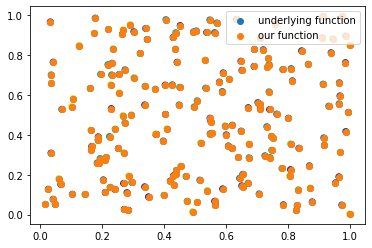

In [ ]:
# # # Make non-linear data, using 3 dimensional input data and 2 output neurons
n = 200
d1 = 3
d2 = 2
input_dim = 3
output_dim = 2
learning_rate = 0.01
# This is our weight matrix
w = tf.Variable(tf.random.uniform(shape=(input_dim, output_dim)))
# This is our bias vector
b = tf.Variable(tf.zeros(shape=(output_dim,)))
x = tf.Variable(tf.random.uniform(shape=(n, d1)))
y = tf.Variable(tf.random.uniform(shape=(n, d2)))

y_true = tf.matmul(tf.pow(x,2), w) + tf.matmul(x, w) + b
plt.scatter(x[:, 0], x[:, 1], c=y[:, 0])
plt.scatter(x[:, 0], x[:, 1], label='underlying function')
if y_true is not None:
  plt.scatter(x[:, 0], x[:, 1], label='our function')
  plt.legend()

## ExtraCredit: t-SNE 3D Plot

In [ ]:
def plot_intereactive_3d(x, y, y_pred=None):
  import plotly.graph_objects as go

  fig = go.Figure()
  fig.add_trace(go.Scatter3d(x = x[:,0],
                    y = x[:,1],
                    z = y.reshape([-1]),
                    opacity=0.5, mode='markers', name='Underlying Function'
                    ))
 
  if y_pred is not None:
    fig.add_trace(go.Scatter3d(x = x[:,0],
                   y = x[:,1],
                   z = y_pred.reshape([-1]),
                   opacity=0.5, mode='markers', name='Predicted Function'
                  ))
    
  fig.update_layout(scene = dict(
                    xaxis_title='X1',
                    yaxis_title='X2',
                    zaxis_title='Y'),
                    width=700,
                    margin=dict(r=20, b=10, l=10, t=10))
  fig.show()

In [ ]:
from sklearn.manifold import TSNE
X_reduced = TSNE(n_components=2).fit_transform(x)
y_true_reduced = TSNE(n_components=1).fit_transform(y_true)
y_pred_reduced = TSNE(n_components=1).fit_transform(model(x))
print(f'X_reduced: {X_reduced.shape}, y_true_reduced: {y_true_reduced.shape}, y_pred_reduced: {y_pred_reduced.shape}')
plot_intereactive_3d(X_reduced,y_true_reduced,y_pred_reduced)

X_reduced: (500, 2), y_true_reduced: (500, 1), y_pred_reduced: (500, 1)
